In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

pd.set_option('display.float_format', lambda x: '%.2f' % x)

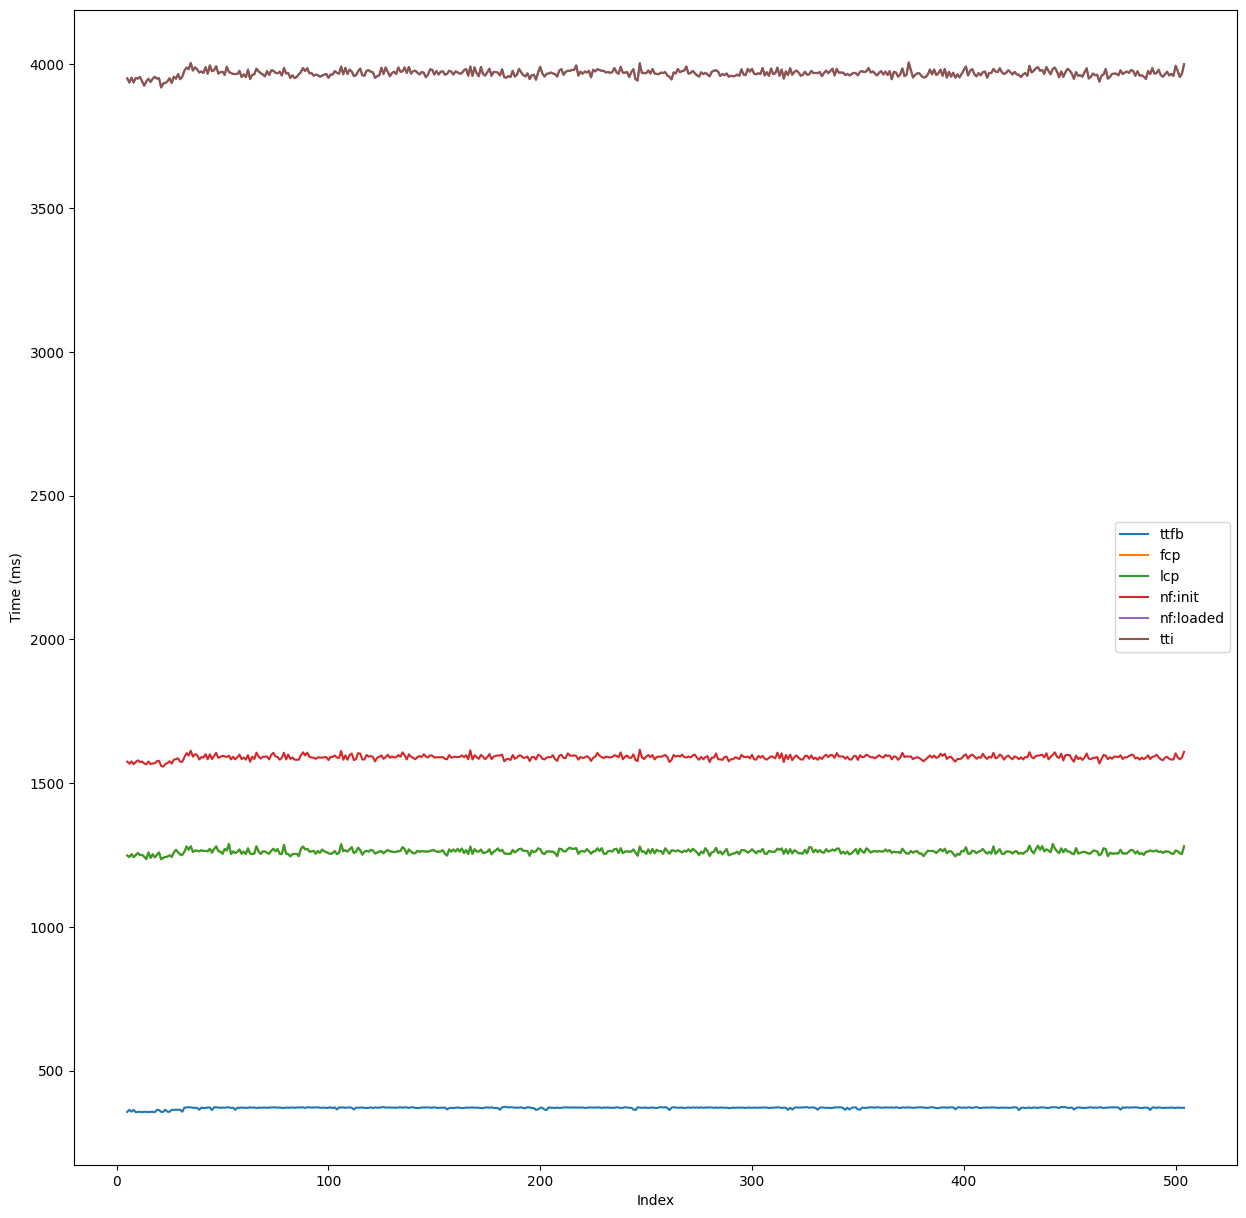

In [6]:
df = pd.read_csv('../../../../data/core-web-vitals/testrun-8/results-ssrh-throttled-heavy.csv', sep=',')

features = ['navTime', 'totalTime', 'lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longestTask', 'longTasks', 'nf:init', 'nf:config','nf:loaded']
target_features = ['ttfb', 'fcp', 'lcp',  'nf:init', 'nf:loaded', 'tti'] #

# Remove Java warmup
df = df.iloc[5:]

# Plotting the line graph for ttfb, fcp, and tti
plt.figure(figsize=(15, 15))
for t in target_features:
    plt.plot(df[t], label=t)

plt.xlabel('Index')
plt.ylabel('Time (ms)')
plt.legend()
plt.show()

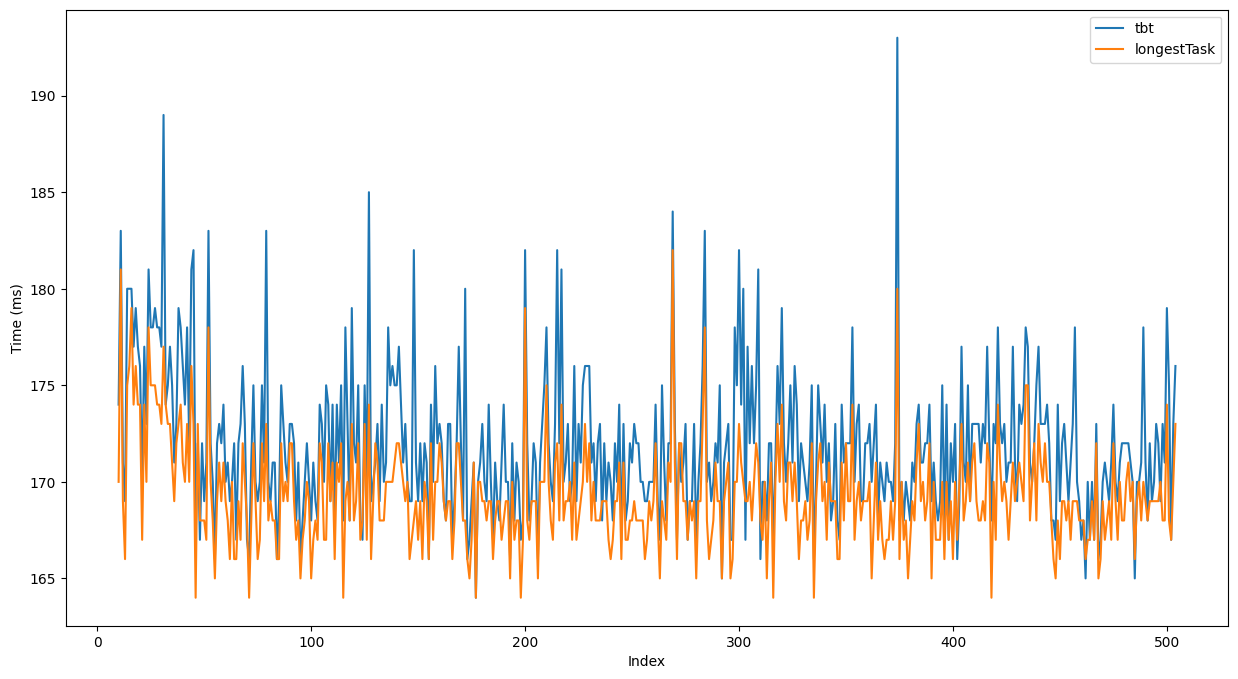

In [4]:

target_features = ['tbt', 'longestTask'] #

# Remove Java warmup
df = df.iloc[5:]

# Plotting the line graph for ttfb, fcp, and tti
plt.figure(figsize=(15, 8))
for t in target_features:
    plt.plot(df[t], label=t)

plt.xlabel('Index')
plt.ylabel('Time (ms)')
plt.legend()
plt.show()

In [5]:
features = ['navTime', 'totalTime', 'lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longestTask', 'longTasks', 'nf:init', 'nf:config','nf:loaded']
headers = ["feature","Tests", "min", "1st Qrt.", "mean", "median", "3rd Qrt.", "max", "std dev."] 
report = []

for f in features:
  report.append([
      f,
      df[f].size,
      df[f].min(),
      df[f].quantile(0.25),
      df[f].mean(),
      df[f].median(),
      df[f].quantile(0.75),
      df[f].max(),
      df[f].std(),
  ])

pd.DataFrame(report, columns=headers)

,feature,Tests,min,1st Qrt.,mean,median,3rd Qrt.,max,std dev.
0,navTime,495,329.00,344.00,344.38,345.00,346.00,350.00,3.32
1,totalTime,495,3931.00,3975.00,3982.71,3983.00,3990.00,4049.00,12.13
2,lcp,495,1235.10,1255.80,1261.72,1261.80,1266.00,1288.30,7.90
3,fcp,495,1235.10,1255.80,1261.72,1261.80,1266.00,1288.30,7.90
4,ttfb,495,355.10,370.20,370.19,371.10,371.80,374.10,3.15
5,tbt,495,164.00,169.00,171.93,171.00,173.50,193.00,3.78
6,tti,495,3919.30,3961.80,3969.34,3969.40,3976.50,4007.40,11.79
7,longestTask,495,164.00,168.00,169.29,169.00,170.50,182.00,2.67
8,longTasks,495,3.00,3.00,3.00,3.00,3.00,3.00,0.00
9,nf:init,495,1557.20,1584.00,1589.76,1590.20,1595.25,1616.00,8.12
